# Статистика, DS-поток
## Практическое задание 4


**Правила:**

* Дедлайн **4 октября 16:00**. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds22_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

* Задача 1 &mdash;  50 баллов
* Задача 2 &mdash;  150 баллов

**Важность задач:**

* *высокая:* задача 1, 3;
* *средне-высокая:* задача 2.

In [155]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5, palette='Set2')

%matplotlib inline

_______
## Задача 1.
Дана параметрическая модель и 3 выборки, состоящие из 2-3 наблюдений. Для удобства, выборки представлены в виде python-кода — каждая выборка записана как список ее элементов; множество выборок представлено как список списков, соответствующих выборкам из множества. Нужно для каждой выборки построить график функции правдоподобия.

*a).* Параметрическая модель $\mathcal{N}(\theta, 1)$, выборки: `[[-1, 1], [-5, 5], [-1, 5]]`

*b).* Параметрическая модель $Exp(\theta)$, выборки: `[[1, 2], [0.1, 1], [1, 10]]`

*c).* Параметрическая модель $U[0, \theta]$, выборки: `[[0.2, 0.8], [0.5, 1], [0.5, 1.3]]`

*d).* Параметрическая модель $Bin(5, \theta)$, выборки: `[[0, 1], [5, 5], [0, 5]]`

*e).* Параметрическая модель $Pois(\theta)$, выборки: `[[0, 1], [0, 10], [5, 10]]`

*f).* Параметрическая модель $Сauchy(\theta)$, где $\theta$ — параметр сдвига, выборки: `[[-0.5, 0.5], [-2, 2], [-4, 0, 4]]`

Выполнить задание, не создавая много кода, поможет следующая функция.

In [156]:
def draw_likelihood(density_function, grid, samples, label):
    '''
    Изображает график функции правдоподобия для каждой из 3 выборок.
    
    Аргументы:
        density_function --- функция, считающая плотность 
            (обычную или дискретную). На вход данная функция 
            должна принимать массив размера (1, len_sample)
            и возвращать массив размера (len_grid, len_sample).
        grid --- массив размера (len_grid, 1), являющийся 
                 сеткой для построения графика;
        samples --- три выборки;
        label --- latex-код параметрической модели.
    '''
    
    assert len(samples) == 3, "Число выборок не равно 3."

    plt.figure(figsize=(18, 5))
    for i, sample in enumerate(samples):
        sample = np.array(sample)[np.newaxis, :]
        likelihood = np.prod(density_function(sample), axis=1)

        plt.subplot(1, 3, i+1)
        plt.plot(grid, likelihood)
        plt.xlabel('$\\theta$', fontsize=16)
        plt.grid(ls=':')
        plt.title(label + ', sample=' + str(sample), fontsize=16)
    plt.show()

Первый пункт можно выполнить с помощью следующего кода:

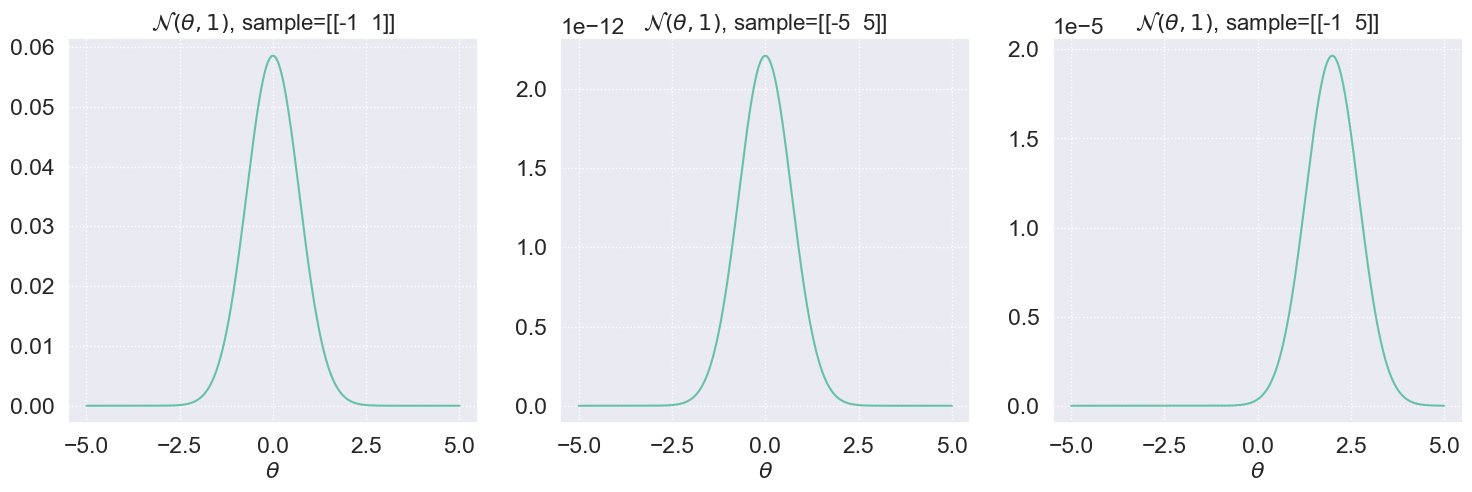

In [157]:
grid = np.linspace(-5, 5, 1000).reshape((-1, 1))
draw_likelihood(sps.norm(loc=grid).pdf, grid, 
                [[-1, 1], [-5, 5], [-1, 5]], '$\\mathcal{N}(\\theta, 1)$')

Выполните остальные:

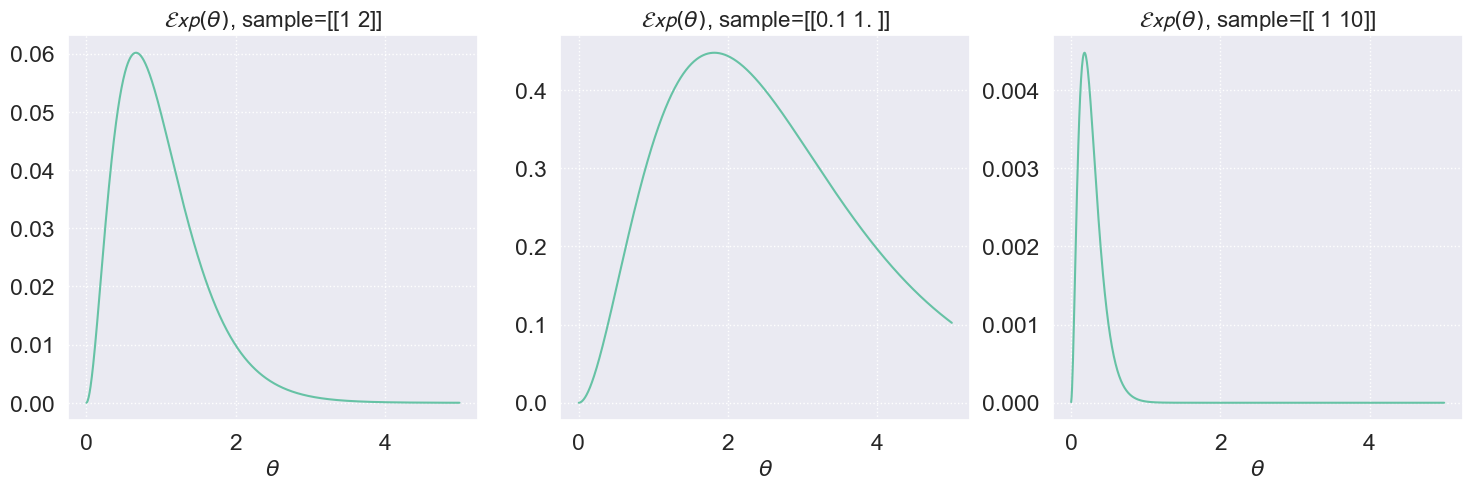

In [214]:
grid = np.linspace(-1, 5, 1000).reshape((-1, 1))
draw_likelihood(sps.expon(scale=1 / grid).pdf, grid, 
                [[1, 2], [0.1, 1], [1, 10]], '$\\mathcal{Exp}(\\theta)$')

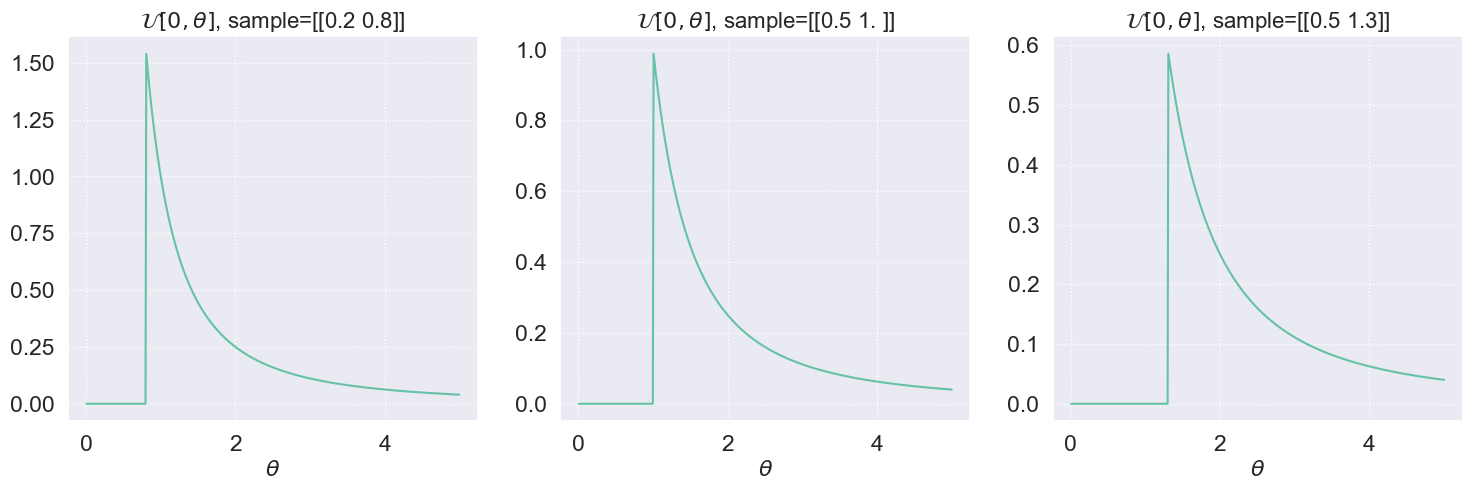

In [159]:
grid = np.linspace(-5, 5, 1000).reshape((-1, 1))
draw_likelihood(sps.uniform(loc=np.zeros(1000).reshape(-1, 1), scale=grid).pdf, grid, 
                [[0.2, 0.8], [0.5, 1], [0.5, 1.3]], '$\\mathcal{U}[0, \\theta]$')

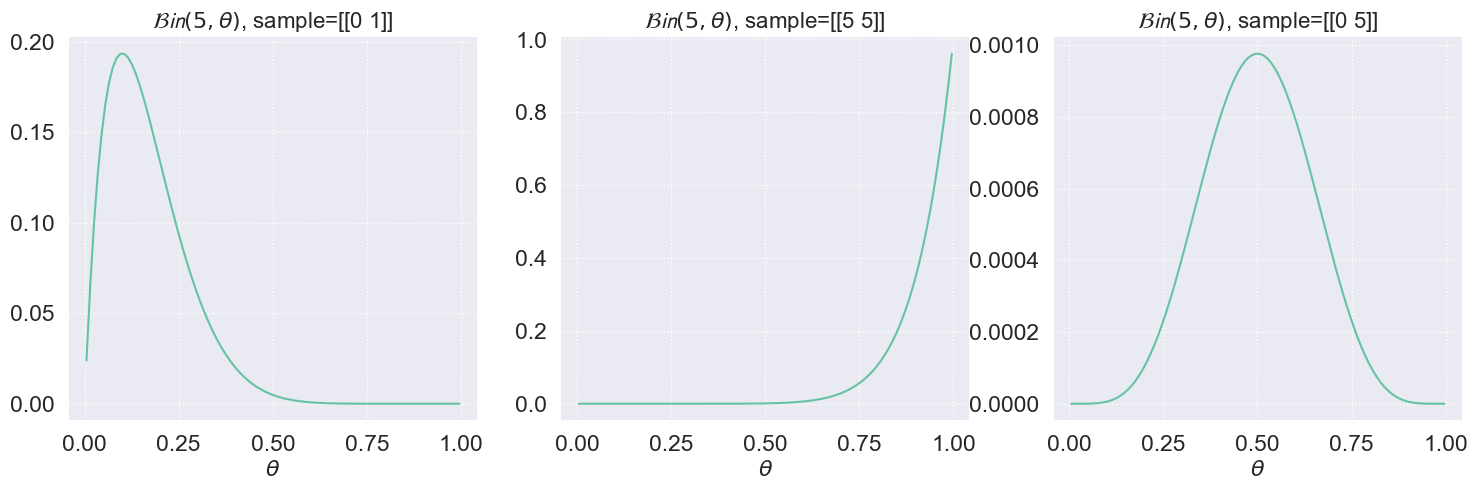

In [160]:
grid = np.linspace(-5, 5, 1000).reshape((-1, 1))
draw_likelihood(sps.binom(n=5, p=grid).pmf, grid, 
                [[0, 1], [5, 5], [0, 5]], '$\\mathcal{Bin}(5, \\theta)$')

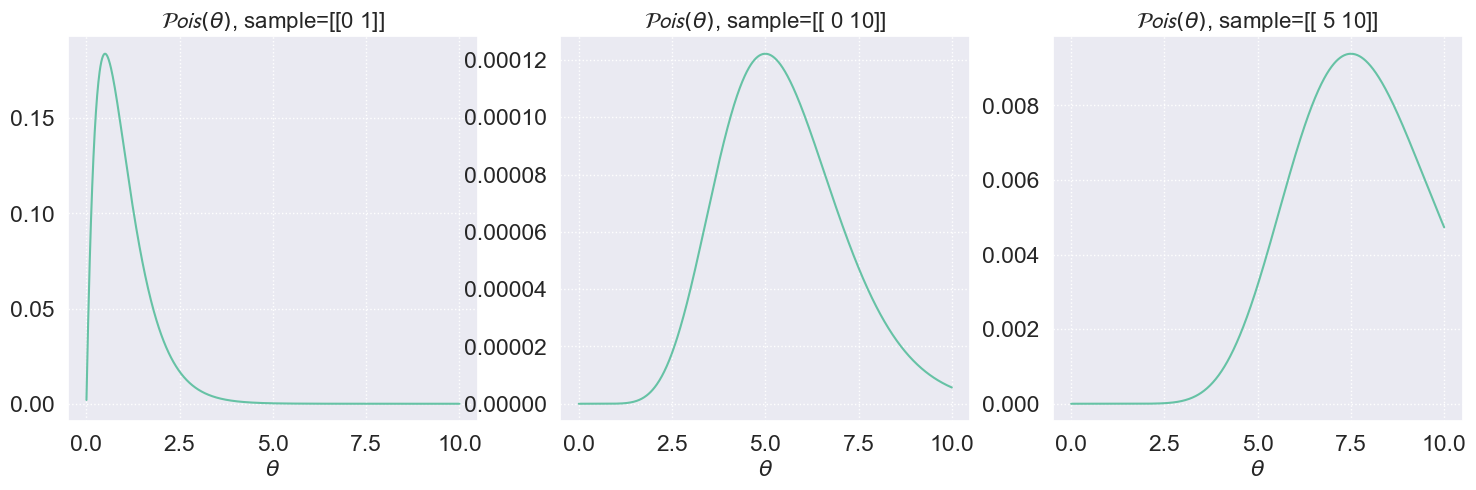

In [161]:
grid = np.linspace(-1, 10, 1000).reshape((-1, 1))
draw_likelihood(sps.poisson(mu=grid).pmf, grid, 
                [[0, 1], [0, 10], [5, 10]], '$\\mathcal{Pois}(\\theta)$')

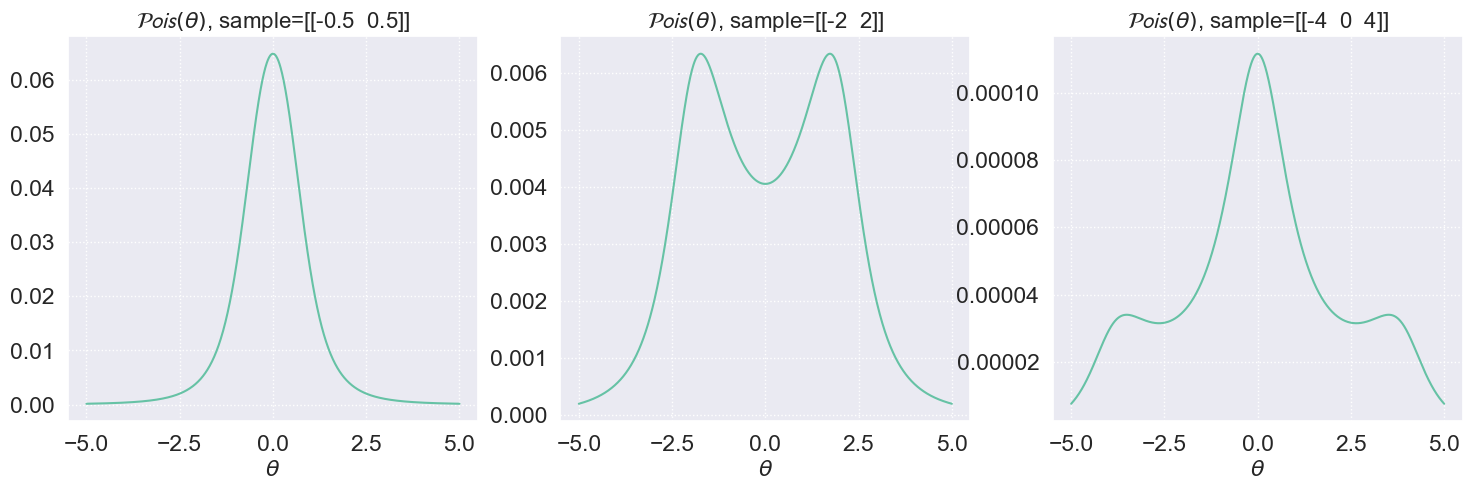

In [162]:
grid = np.linspace(-5, 5, 1000).reshape((-1, 1))
draw_likelihood(sps.cauchy(loc=grid).pdf, grid, 
                [[-0.5, 0.5], [-2, 2], [-4, 0, 4]], '$\\mathcal{Pois}(\\theta)$')

Прокомментируйте полученные графики. Сделайте вывод о том, как функция правдоподобия для каждой модели зависит от выборки. Является ли функция правдоподобия плотностью?

**Вывод:**

1. Из графика видно, что практические значения соотвествуют теоретическим, тк максимум likelihood достигается при $a = \overline{X}$. Да и сам график похож на график нормального распределения.
2. Из графика также видно соответствие теоретическим данным $\theta = 1 / \overline{X}$. Также видно, что чем больше значения выборки, тем более уже он становится.
3. Здесь график также совпадает с тем, что мы рисовали на лекции и семинаре. Значения пика напрямую зависят от $X_{(n)}$.
4. Видно, что чем больше значения выборки, тем дальше график будет находиться от оси начала и тем большая дисперсия наблюдается.
5. Опять же видим, что чем больше разброс значений в выборке, тем график "толще".
6. Здесь же видим, что в зависимости от размера выборки, их значений у графика наблюдается несколько пиков. Теоретически такой случай был рассмотрен в теоретической части задания, там выяснилось, что если $|x_1 - x_2| < 2$, то пик один, иначе два (при размере выборки равным двум).

Сгенерируем выборку большого размера из стандартного нормального распределения и посчитаем ее функцию правдоподобия в модели $\mathcal{N}(\theta, 1)$. Выполните код ниже:

In [163]:
sample = sps.norm.rvs(size=10**5)
likelihood = sps.norm.pdf(sample).prod()
print(likelihood)

0.0


Почему результат отличается от ожидаемого? Как обойти эту неприятность для подсчета оценки максимального правдоподобия? Реализуйте это.

*Подсказка:* нужно использовать некоторый метод класса, реализующий это распределение

In [215]:
sample = sps.norm.rvs(size=10**5)
log_likelihood = sps.norm.logpdf(sample).sum()
print(log_likelihood)

-141988.49122557437


**Ответ на вопрос и описание метода решения проблемы:**

Вместо обычного likelihood я посчитал log_likelihood, проблема заклбчалась в том, что значения likelihood были меньше 1 и их произведение стремилось к 0. При логарифме же мы не умножаем, а суммируем наши значения и точности хватает, мы видим, что получили очень маленькое значение: $e^{-141988}$

______
## Задача 2. 
Компания выпустила $n$ серверов новой модели с увеличенным сроком службы. До начала продаж компания должна провести эксперимент по оценке среднего срока службы серверов. Известно, что сервера могут сломаться в любой момент независимо от того, сколько времени уже проработали. Таким образом, распределение времени работы сервера до поломки обладает свойством отсутствия памяти. Как вы знаете, таким свойством среди непрерывных распределений обладает только экспоненциальное распределение.

Компания начала проводить эксперимент, но сервера получились настолько хорошими, что многие еще не сломались, а бизнес уже требует запускать их продажи. Тем самым усложняется задача для аналитиков, которым приходит "обрезанная" выборка.

Рассмотрим задачу более формально. Пусть $X = (X_1, \ldots, X_n)$ &mdash; выборка из экспоненциального распределения с параметром $\theta$ с плотностью $p_\theta(x) = \theta e^{-\theta x}I\{x \geq 0\}$. \
При этом наблюдается выборка $Y = (Y_1, \ldots, Y_n)$, где, $Y_i$ определены следующим образом:
$$
\begin{equation}
  Y_i=\begin{cases}
    X_i, & \text{если $X_i \leq c$}.\\
    c, & \text{если $X_i > c$}.
  \end{cases}
\end{equation}
$$
Иначе говоря, $Y_i = \min(X_i, c)$, где $c$ &mdash; некоторая константа.
Выборка является смесью непрерывного и дискретного распределения, поэтому функция правдоподобия не определена. Вам предлагается реализовать и сравнить три подхода к оценке неизвестного параметра:
1. Рассмотреть подвыборку, состоящую из $Y_i < c$, и найти для нее ОМП. Учтите, что необходимо использовать условное распределение $Y_i$ при условии $Y_i < c$.
2. Найти оценку, используя метод моментов.
3. Найти ОМП по дискретизованной выборке, выполнив следующие действия.

    а) Разбить полуинтервал $[0, c)$ на $k$ бинов (множеств) вида $[a_i, a_{i+1})$, где $0=a_0<a_1<...<a_k=c$. В качестве границ бинов возьмите целые числа.
    
    б) Определить $Z_i$ как номер бина, в который попадает $Y_i$, считая при этом множество $\{c\}$ как $(k+1)$-й бин. Вам может помочь функция [`np.digitize`](https://numpy.org/doc/stable/reference/generated/numpy.digitize.html).
    
    в) Найти вероятности $p_j(\theta) = \mathsf{P}_\theta(Z_1 = j)$, которые определяют распределение $Z_i$, являющееся дискретным.
    
    г) Найти ОМП по выборке $Z_1, ..., Z_n$, используя ее распределение.

Рассмотрите $c = 10$, а в качестве истинного значения параметра возьмите $\theta = 0.15$. Обратите внимание на параметризацию в [`scipy.stats.expon`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html).
Получить точный ответ в виде формулы у вас скорее всего не получится, воспользуйтесь численными методами.

Насколько точным получается оценка в зависимости от подхода и размера выборки?

**Решение:**

In [216]:
n = 10**5
c = 10
theta = 0.15
sample_X = sps.expon(scale=1/theta).rvs(size=n)
sample_Y = np.array(list(map(lambda x: x if x <= c else c, sample_X)))

Теоретические выкладки.

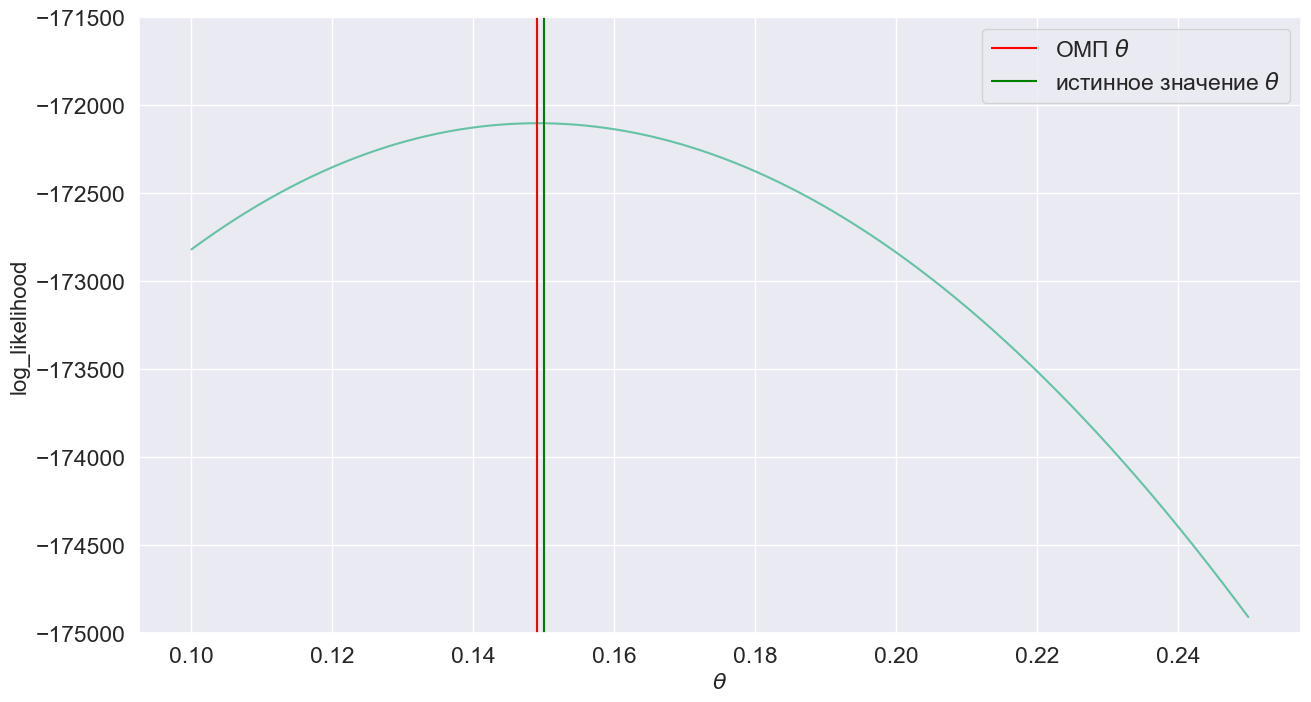

In [217]:
grid = np.linspace(0.1, 0.25, 1000).reshape(-1, 1)
sample_Yc = sample_Y[sample_Y < c]
log_likelihood = np.sum(np.log(sps.expon(scale=1/grid.reshape(-1, 1)).pdf(sample_Yc)) - \
                        np.log(sps.expon(scale=1/grid).cdf(c)), axis=1)
theta_grade = np.argmax(log_likelihood)

plt.figure(figsize=(15, 8))
plt.plot(grid, log_likelihood);
plt.xlabel('$\\theta$', fontsize=16)
plt.ylabel('log_likelihood', fontsize=16)
plt.vlines(grid[theta_grade], ymin=-175000, ymax=-171500, label = 'ОМП $\\theta$', color='red')
plt.vlines(theta, ymin=-175000, ymax=-171500, label = 'истинное значение $\\theta$', color='green')
plt.ylim(-175000, -171500)
plt.legend();

In [218]:
print('Оценка, полученная первым методом:', *grid[theta_grade])

Оценка, полученная первым методом: 0.1490990990990991


У меня не получилось выразить из этого уравнения $\theta$ явно, поэтому для того, чтобы найти минимум пройдемся по сетке и будем искать минимум функции.

In [219]:
def dependence(param, Y, c):
    return abs(1 / param * (1 - np.exp(-c * param)) - Y.mean())

In [220]:
min_dependence = 1e5
min_param = 0
grid = np.linspace(0.1, 0.25, 10000)
for param in grid:
    value = dependence(param=param, Y=sample_Y, c=c)
    if value < min_dependence:
        min_dependence = value
        min_param = param

In [221]:
print('Оценка, полученная первым методом:', min_param)

Оценка, полученная первым методом: 0.1498049804980498


In [212]:
grid = np.linspace(0.1, 0.25, 1000)
bins = np.arange(c + 1)
Z = np.digitize(sample_Y, bins)

**Вывод:** Видно, что обе оценки очень близки к истинному значению параметра (третью оценку я не успел посчитать). Первый способ не очень хороший, тк мы забываем и не рассматриваем часть информации, которая может оказаться довольно большой. Второй метод не очень хороший из-за того, что мы проходимся по сетке и можем пропустить какое либо оптимальное значение параметра.